In [17]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
# see also the "datetime" package
import solutions
from solutions import constell_davenport


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

# Part 2: Speed Racer!
Let's figure out which of the solutions from last week is the fastest. 

To do this, we want to evaluate the runtime for a varying number of coordinates.

In [18]:
# This tells you the system time in seconds (from some system-dependent zero point)
time.time()

1461714082.75143

**NOTE:** this is *not* the best way to measure time, but it illustrates how the process works. 

Read about the [timeit](https://docs.python.org/2/library/timeit.html) module, and definitely the doccumentation of the [time](https://docs.python.org/3.5/library/time.html) module we're using.

In [19]:
# here's a simple way to determine how long something takes to evaluate:
t0 = time.time()

# do some random task
x = -1
for k in range(0,100000):
    x = k*x

t1 = time.time()

duration = t1 - t0
print('This task took: ' + str(duration) + ' seconds')

This task took: 0.019249916076660156 seconds


In [20]:
# here's how you might return two numbers or arrays from a function

def myfunc(a):
    out1 = a+2
    out2 = a-2
    return out1, out2


In [31]:
#take in the number of coordinates we are supposed to test
def test_algorithms(N): 

    import solutions
    
    ras = np.random.random(N)*24
    decs = np.random.random(N)*180 - 90.
    
    davenport_go = time.time()
    constell_davenport(ras, decs)
    davenport_stop = time.time()
    
    davenport_time = davenport_stop - davenport_go
    
    christenson_go = time.time()
    for i in range(N):
        solutions.constell_christenson(ras[i], decs[i])
        
    christenson_stop = time.time()
    
    christenson_time = christenson_stop - christenson_go
    
    return christenson_time, davenport_time

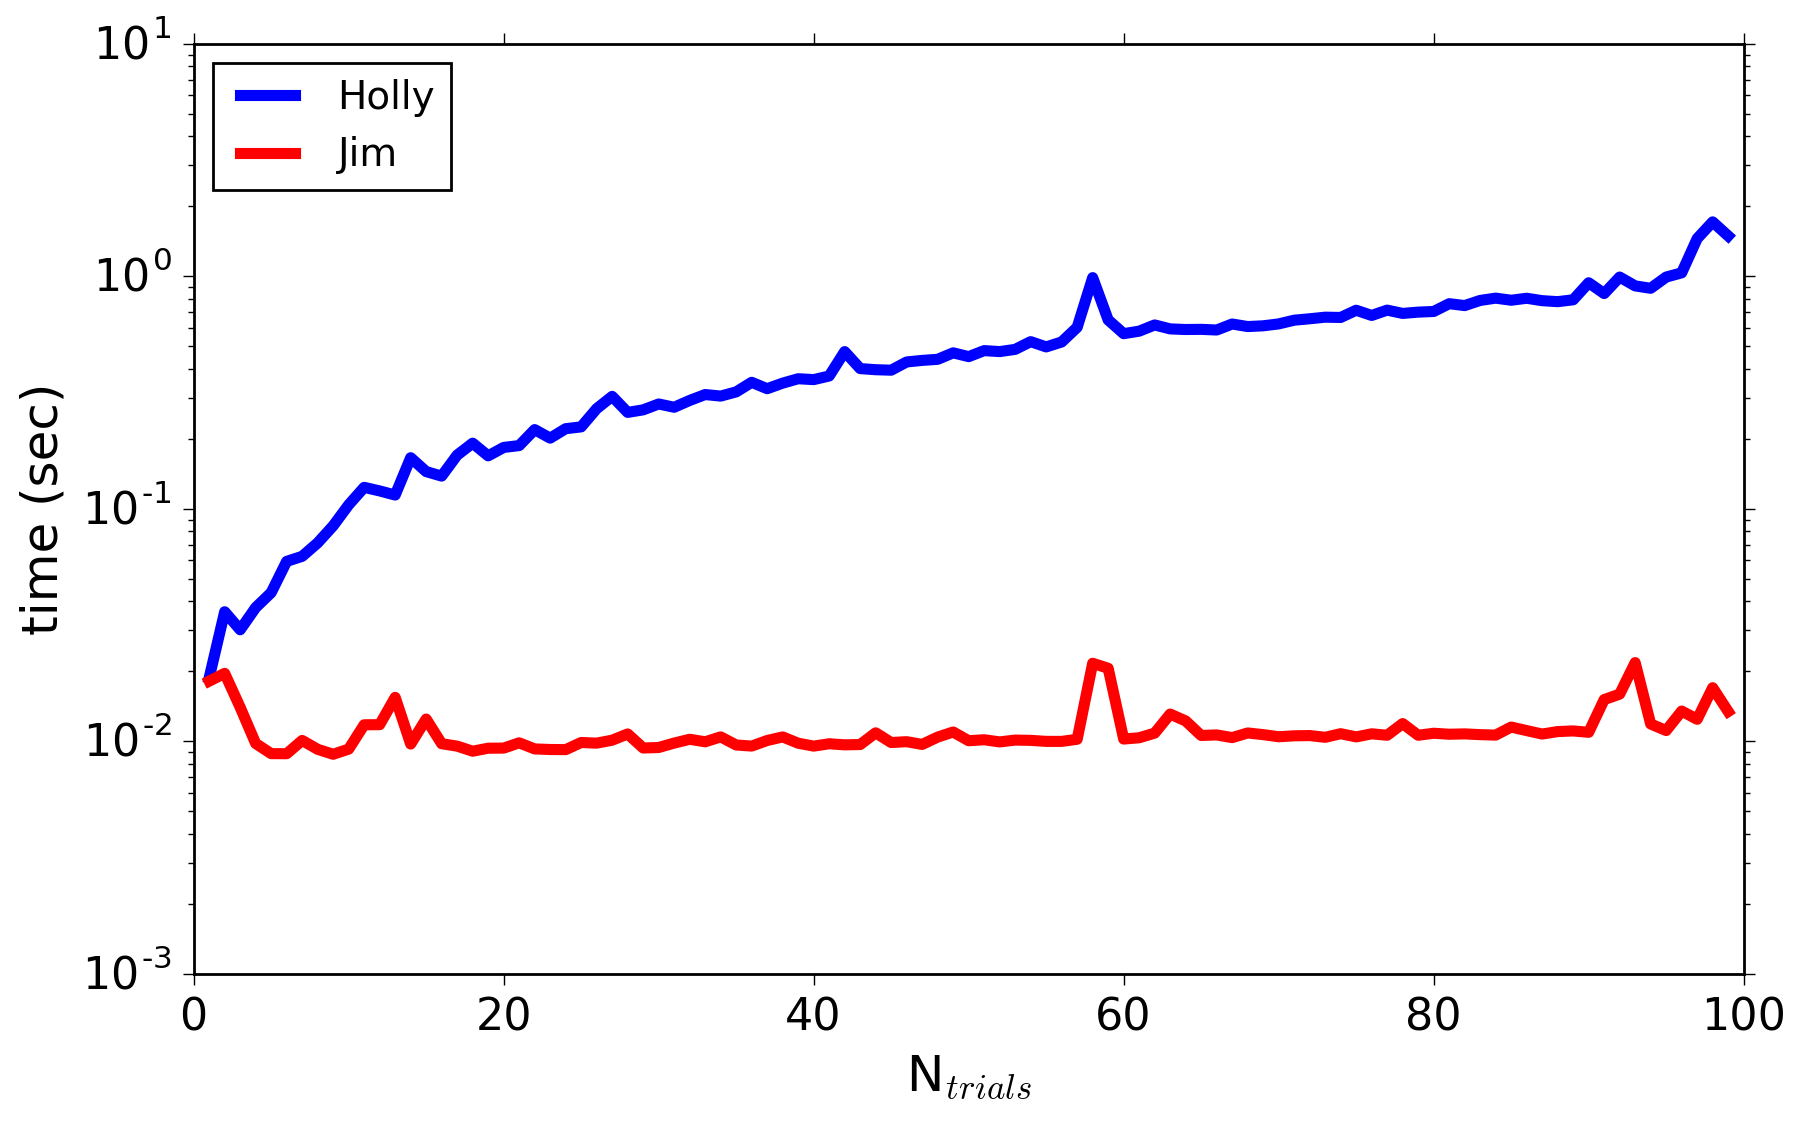

In [36]:
n_trials = 100
trial = np.ones(n_trials)
christenson_times = np.zeros(n_trials)
davenport_times = np.zeros(n_trials)

for i in range(1,n_trials):
    christenson_times[i], davenport_times[i] = test_algorithms(i)
    trial[i] = i
    
hollyplot, = plt.semilogy(trial, christenson_times, linewidth = 4, color = 'b', label = 'Holly')    
jimplot, = plt.semilogy(trial, davenport_times, linewidth = 4, color = 'r', label = 'Jim')   
xlabel = plt.xlabel('N$_{trials}$') 
ylabel = plt.ylabel('time (sec)')
plt.legend(handles=[hollyplot, jimplot], loc=2)
plt.savefig('ConstellationQuickness.png', bbox_inches='tight')

In [6]:
# an example of random numbers uniformly chosen in the range -5 to 5

# note, other random number distributions exist, and are very useful (e.g. Gaussian!)

N = 20

rmax = 5
rmin = -5

rando_calrissian = np.random.random(N) * (rmax - rmin) + rmin

rando_calrissian

array([ -1.36583986e+00,   2.26993929e+00,  -2.63414193e+00,
        -2.51724780e-03,   3.95029929e+00,   3.01508626e+00,
         3.84546524e+00,   6.39134048e-01,   4.60345070e+00,
        -9.01896976e-01,   1.76949403e+00,   4.10322721e+00,
         3.01389378e+00,  -3.35200722e-01,   4.08001537e+00,
         2.71936901e+00,   1.09474529e+00,  -3.36933638e+00,
        -2.87079645e+00,  -3.90944166e+00])

# Part 3: Write some unit tests

**unittest**: There *is* a [built-in framework](https://docs.python.org/2.7/library/unittest.html) for formally handling unit tests. It is a little difficult to start using, and we won't use it today. There are some nicer testing suites available (e.g. [nose](https://nose.readthedocs.org/en/latest/))

**Exceptions**: Python defines a bunch of [built-in exceptions](https://docs.python.org/2/library/exceptions.html) that can come up when code crashes. In general you'll try to [catch these](https://wiki.python.org/moin/HandlingExceptions) and handle them gracefully. Usually I write Try/Except statements as I find these errors


In [7]:
def number_test(input):
    '''
    An example of using a Try/Except statement to catch an error.
    You could imagine doing something more useful than just printing stuff to the screen...
    '''
    try:
        val = float(input)
        print('Yup...')
    except ValueError:
        print("Not a float!")

In [8]:
a = 'hamburger'
b = 123.45

number_test(b)

Yup...


# Test if Jim & Holly agree

In [48]:
#take in the number of coordinates we are supposed to test
def test_algorithm_agreement(N): 

    import solutions
    
    ras = -np.random.random(N)*24
    decs = -np.random.random(N)*180 - 90.

    #ras = 'nope'
    #decs = 'nope'
    
    correct = np.zeros(N)
    
    for i in range(N):
        jim_solution = solutions.constell_davenport(ras[i], decs[i])
        holly_solution = solutions.constell_christenson(ras[i], decs[i])
        if (holly_solution == jim_solution):
            correct[i] = 1
    
    return sum(correct)/N

In [49]:
print(test_algorithm_agreement(1))

IndexError: index 0 is out of bounds for axis 0 with size 0

I get that both algorithms silently fail when passed strings.  
Both also vocally fail if passed negative numbers.